<span style="color:green;float:right">Homepage: https://spkit.github.io</span>
<br><span style="color:green;float:right">Nikesh Bajaj : http://nikeshbajaj.in</span>

# Classification Trees: Depth & Decision boundaries using SpKit

**Note**:In this notebook, we show, how the depth of a decision tree affect the decision boundries for classification. With toy examples of simulated 2D datasets, plotting the decsison boundries allows us to understand the overfitting of tree. You will be able to observe that by lowering the depth of tree, you can minimize the overfitting. Higher depth of a tree create a much complex decision boundry to classify each example in training correctly, as a consequences, it fails to generalize for test data. The take away message of this notebook is be careful to choose hyperparameter ***max_depth*** for a tree before training.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries-&amp;-Functions" data-toc-modified-id="Libraries-&amp;-Functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Libraries &amp; Functions</a></span></li></ul></li><li><span><a href="#Toy-examples-:-Grid" data-toc-modified-id="Toy-examples-:-Grid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Toy examples : Grid</a></span></li><li><span><a href="#Toy-Examples-with-tree-with-different-depth" data-toc-modified-id="Toy-Examples-with-tree-with-different-depth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Toy Examples with tree with different depth</a></span></li></ul></div>

### Libraries & Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import spkit
from spkit.data import dataGen as ds
from spkit.ml import ClassificationTree

spkit.__version__

'0.0.9'

In [2]:
np.random.seed(100) # just to ensure the reproducible results

In [3]:
def get2DGrid(X,density=100):
    mn1,mn2 = np.min(X,axis=0)
    mx1,mx2 = np.max(X,axis=0)
    x1 = np.linspace(mn1,mx1,density)
    x2 = np.linspace(mn2,mx2,density)
    x1,x2 = np.meshgrid(x1,x2)
    Xt = np.c_[x1.flatten(),x2.flatten()]
    return Xt

def plotXy(X,y,ax=None,m='o',alpha=0.2):
    clr = ['b','r','g','y','m','k']
    cls = np.unique(y)
    for i in range(len(cls)):
        c = cls[i]
        ax.plot(X[y==c,0],X[y==c,1],m+clr[i],alpha=alpha)

## Toy examples : Grid

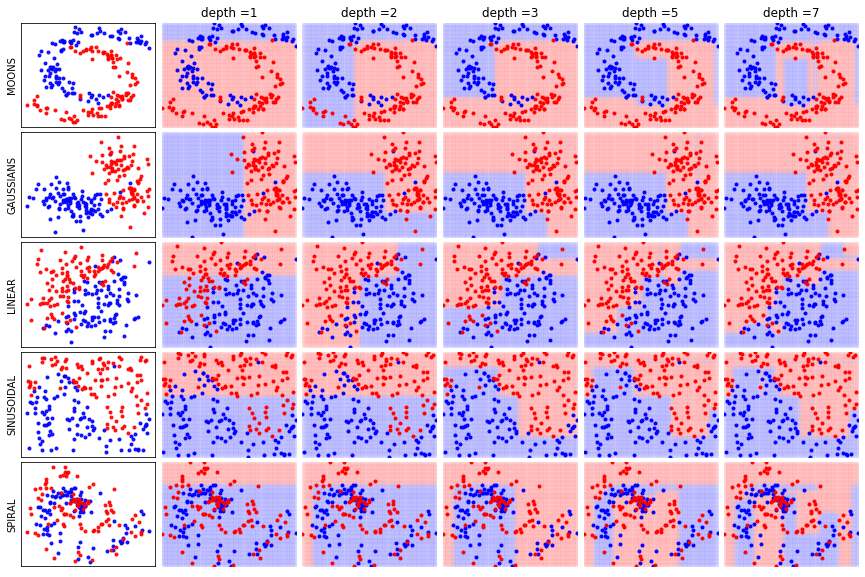

In [4]:
dType=['MOONS', 'GAUSSIANS', 'LINEAR', 'SINUSOIDAL', 'SPIRAL']

plt.figure(figsize=(15,10))

for k in range(len(dType)):
    dtype = dType[k]
    X,y,_ = ds.create_dataset(N=200, Dtype=dtype, noise=0.01)
    Xt    = get2DGrid(X,density=80)
    mns = np.min(Xt,axis=0)
    mxs = np.max(Xt,axis=0)

    
    depths = [1,2,3,5,7]
    N = len(depths)+1

    
    plt.subplot(5,N,k*N+1)
    plotXy(X,y,ax=plt,m='.',alpha=0.9)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(dtype)

    for i in range(len(depths)):
        d = depths[i]
        clf = ClassificationTree(max_depth=d)
        clf.fit(X,y,verbose=0,feature_names=['x1','x2'])
        yt = clf.predict(Xt)
        yp = clf.predict(X)
        acc = np.around(np.mean(y==yp),2)
        plt.subplot(5,N,k*N+i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
        #plt.subplot(2,1,2)
        plotXy(Xt,yt,ax=plt,m='o',alpha=0.02)
        plotXy(X,y,ax=plt,m='.',alpha=0.99)
        plt.xlim([mns[0],mxs[0]])
        plt.ylim([mns[1],mxs[1]])
        plt.axis('off')
        if k==0: plt.title('depth ='+str(d))

        #plt.subplot(2,N,N+i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)
#plt.savefig('trees.png',dpi=300,transparent=False,bbox_inches='tight',pad_inches=0.01)
plt.show()

## Toy Examples with tree with different depth

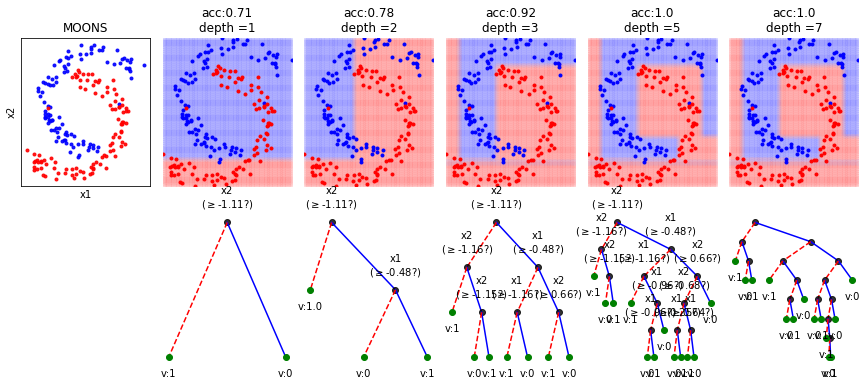

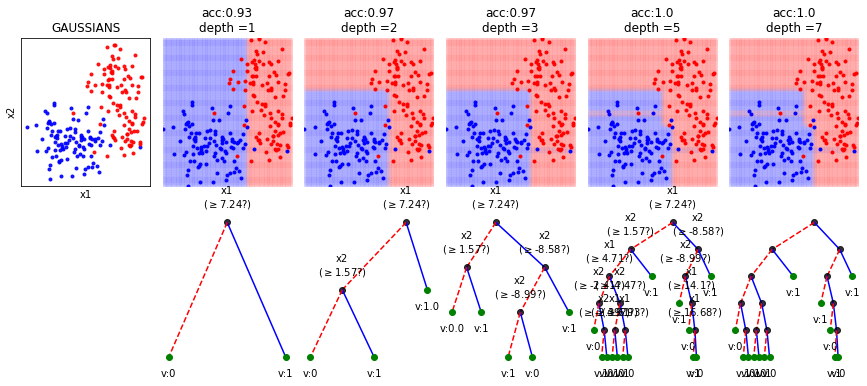

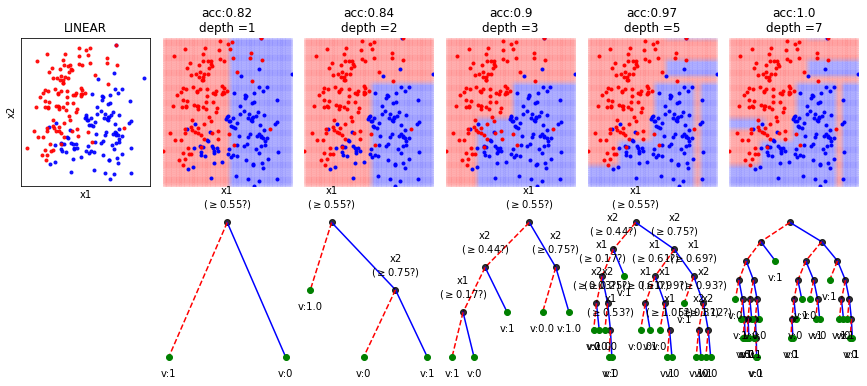

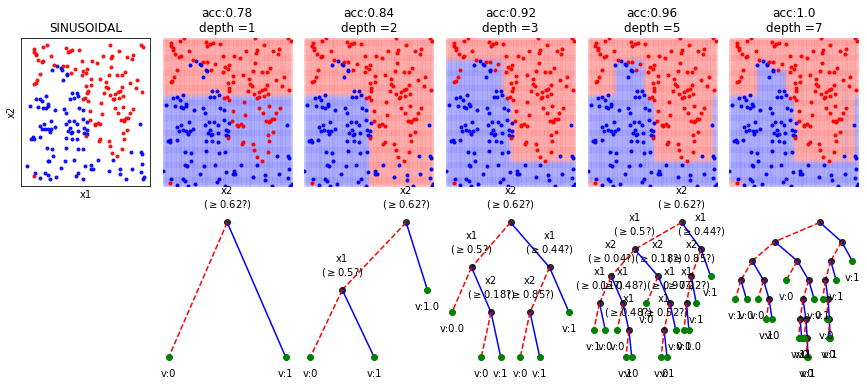

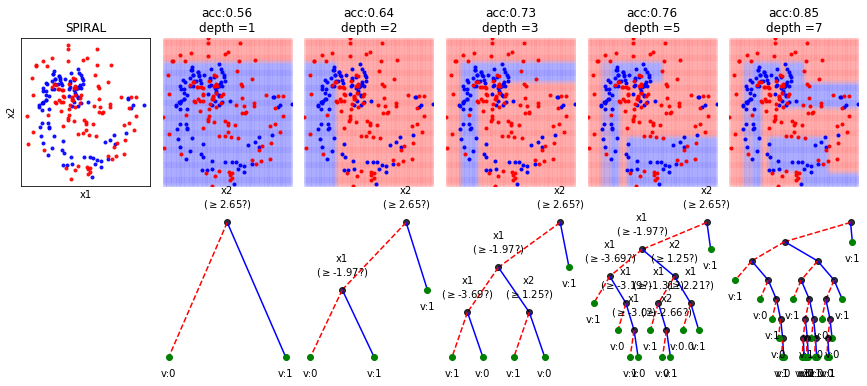

In [5]:
dType=['MOONS', 'GAUSSIANS', 'LINEAR', 'SINUSOIDAL', 'SPIRAL']
for k in range(len(dType)):
    dtype = dType[k]
    X,y,_ = ds.create_dataset(N=200, Dtype=dtype, noise=0.01)
    Xt    = get2DGrid(X,density=80)
    mns = np.min(Xt,axis=0)
    mxs = np.max(Xt,axis=0)



    depths = [1,2,3,5,7]
    N = len(depths)+1

    plt.figure(figsize=(15,6))
    plt.subplot(2,N,1)
    plotXy(X,y,ax=plt,m='.',alpha=0.9)
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(dtype)

    for i in range(len(depths)):
        d = depths[i]
        clf = ClassificationTree(max_depth=d)
        clf.fit(X,y,verbose=0,feature_names=['x1','x2'])
        yt = clf.predict(Xt)
        yp = clf.predict(X)
        acc = np.around(np.mean(y==yp),2)
        plt.subplot(2,N,i+2)
        #clf.plotTree(show=False,DiffBranchColor=True,scale=True,showtitle=False, showDirection=False,legend=False)
        #plt.subplot(2,1,2)
        plotXy(Xt,yt,ax=plt,m='o',alpha=0.03)
        plotXy(X,y,ax=plt,m='.',alpha=0.99)
        plt.xlim([mns[0],mxs[0]])
        plt.ylim([mns[1],mxs[1]])
        plt.axis('off')
        plt.title('acc:'+str(acc)+'\ndepth ='+str(d))

        plt.subplot(2,N,N+i+2)
        if d>5:
            clf.plotTree(show=False,showtitle=False,legend=False,showNodevalues=False, showThreshold=False)
        else:
            clf.plotTree(show=False,showtitle=False,legend=False)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
    #plt.savefig('figures/tree_'+dtype.lower()+'3.png',dpi=300,transparent=False,bbox_inches='tight',pad_inches=0.01)
    plt.show()